# 泰坦尼克号幸存者预测

泰坦尼克号幸存分析（字段介绍）:https://zhuanlan.zhihu.com/p/109323061

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score

In [13]:
data = pd.read_csv('Taitanic_data.csv',index_col = 0)

data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [5]:
# 删除缺失值过多的列，和观察判断来说和预测的y没有关系的列
data.drop(["Cabin","Name","Ticket"],inplace=True,axis=1)

# 处理缺失值，对缺失值较多的列进行填补，有一些特征只确实一两个值，可以采取直接删除记录的方法
data["Age"] = data["Age"].fillna(data["Age"].mean())
data = data.dropna()

# 分类变量转换为数值型变量

# 将二分类变量转换为数值型变量
# astype能够将一个pandas对象转换为某种类型，和apply(int(x))不同，
# astype可以将文本类转换为数字，用这个方式可以很便捷地将二分类特征转换为0~1
data["Sex"] = (data["Sex"]== "male").astype("int")# bool转成int

#将三分类变量转换为数值型变量
labels = data["Embarked"].unique().tolist()
data["Embarked"] = data["Embarked"].apply(lambda x: labels.index(x))#lambda函数实现了

#查看处理后的数据集
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,1,22.0,1,0,7.2500,0
2,1,1,0,38.0,1,0,71.2833,1
3,1,3,0,26.0,0,0,7.9250,0
4,1,1,0,35.0,1,0,53.1000,0
5,0,3,1,35.0,0,0,8.0500,0


In [6]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,1,22.0,1,0,7.2500,0
2,1,1,0,38.0,1,0,71.2833,1
3,1,3,0,26.0,0,0,7.9250,0
4,1,1,0,35.0,1,0,53.1000,0
5,0,3,1,35.0,0,0,8.0500,0


In [7]:
X = data.iloc[:,data.columns != "Survived"]
y = data.iloc[:,data.columns == "Survived"]

In [8]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,y,test_size=0.3)

#修正测试集和训练集的索引
for i in [Xtrain, Xtest, Ytrain, Ytest]:
    i.index = range(i.shape[0])
    
#查看分好的训练集和测试集
Xtrain.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,2,0,34.0,0,1,23.0000,0
1,3,1,2.0,3,1,21.0750,0
2,3,1,19.0,0,0,10.1708,0
3,3,1,34.5,0,0,6.4375,1
4,1,0,24.0,0,0,69.3000,1


In [9]:
clf = DecisionTreeClassifier(random_state=25)
clf = clf.fit(Xtrain, Ytrain)
score_ = clf.score(Xtest, Ytest)

score_

score = cross_val_score(clf,X,y,cv=10).mean()

score

0.7739274770173645

0.8177860061287026


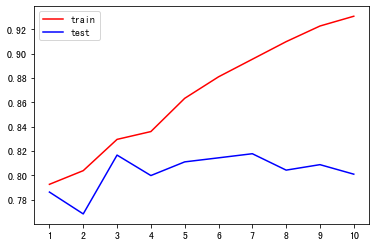

In [10]:
tr = []
te = []
for i in range(10):
    clf = DecisionTreeClassifier(random_state=25
                                 ,max_depth=i+1
                                 ,criterion="entropy"
                                )
    clf = clf.fit(Xtrain, Ytrain)
    score_tr = clf.score(Xtrain,Ytrain)
    score_te = cross_val_score(clf,X,y,cv=10).mean()
    tr.append(score_tr)
    te.append(score_te)
print(max(te))
plt.plot(range(1,11),tr,color="red",label="train")
plt.plot(range(1,11),te,color="blue",label="test")
plt.xticks(range(1,11))
plt.legend()
plt.show()

In [16]:
import numpy as np

gini_thresholds = np.linspace(0,0.5,20)

parameters = {'splitter':('best','random')
              ,'criterion':("gini","entropy")
              ,"max_depth":[*range(1,5)]
              ,'min_samples_leaf':[*range(1,50,5)]
              ,'min_impurity_decrease':[*np.linspace(0,0.5,20)]
             }

clf = DecisionTreeClassifier(random_state=25)
GS = GridSearchCV(clf, parameters, cv=10)
GS.fit(Xtrain,Ytrain)

print(GS.best_params_)

print(GS.best_score_)

{'criterion': 'gini', 'max_depth': 3, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 6, 'splitter': 'best'}
0.8215821812596007
